In [502]:

import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.metrics import ConfusionMatrixDisplay, classification_report

diabetes_df = pd.read_csv("diabetes.csv")

diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [521]:

from sklearn.model_selection import train_test_split

X = diabetes_df.drop('Outcome',axis=1)
y = diabetes_df['Outcome']

#split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.6,
                                                    random_state=70)

In [522]:
model =tree.DecisionTreeClassifier(max_depth=5, random_state=42)

In [523]:

model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [524]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.82      0.77       299
           1       0.56      0.42      0.48       162

    accuracy                           0.68       461
   macro avg       0.64      0.62      0.63       461
weighted avg       0.67      0.68      0.67       461



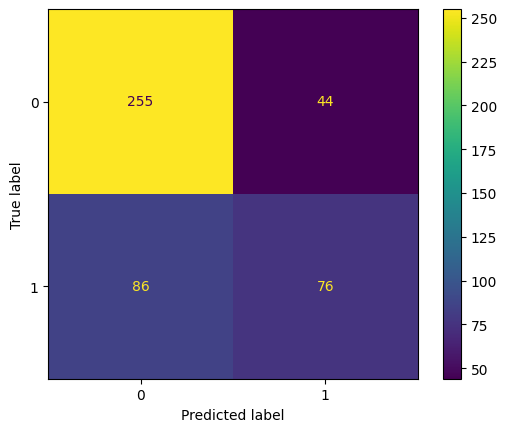

In [520]:

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

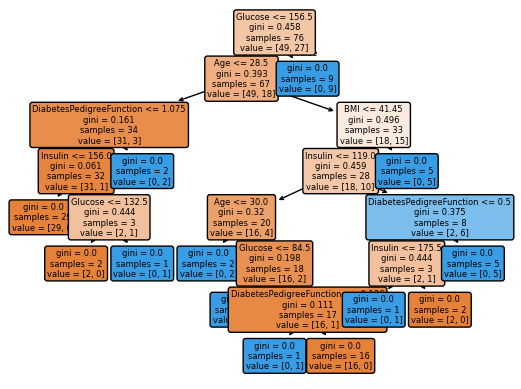

<Figure size 640x480 with 0 Axes>

In [136]:

import matplotlib.pyplot as plt
tree.plot_tree(model, feature_names=list(X.columns),
               filled=True, fontsize=6, rounded=True)

plt.show()
plt.savefig("tree.svg")

In [327]:
def list_names(names):
    if not names:
        return ""
    elif len(names) == 1:
        return names[0]
    elif len(names) == 2:
        return f"{names[0]} & {names[1]}"
    else:
        return ", ".join(names[:-1]) + f" & {names[-1]}"


names = ["Samantha","Angel", "Christian", "Helen","Adams"]
list_names = list_names(names)
print(list_names)  


Samantha, Angel, Christian, Helen & Adams


In [332]:
def list_names(names):
    if not names:
        return ""
    
    list_string = ""
    counter = 0  # Initialize the counter
    
    while counter < len(names):
        if counter == len(names) - 2:  # Second-to-last name
            list_string += names[counter] + " & "
        elif counter == len(names) - 1:  # Last name
            list_string += names[counter]
        else:
            list_string += names[counter] + ", "
        
        counter += 1  
    
    return list_string


names = ["Samantha", "Angel", "Christian", "Helen"]
list_names = list_names(names)
print(list_names)  


Samantha, Angel, Christian & Helen
